# Predict the weather with Machine Learning

In [877]:
import pandas as pd
import sklearn
from sklearn.metrics import mean_squared_error

# Here we read the weather CSV and make our date colun our index column
# This helps us look up values for specific rows

weather = pd.read_csv("local_weather.csv", index_col="DATE")

In [878]:
weather

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,4.47,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2022-01-25,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,4.70,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2022-01-26,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,2.68,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [879]:
# An example of getting slices of data from specific times

weather.loc["1960-01-01":"1960-01-31,:"]

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1960-01-06,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1960-01-07,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
1960-01-08,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-09,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


## Prepare the data for ML

In [880]:
# Here we fix missing values, this code goes column by column through the df and look for any null values
# .sum give us a count of all the null values
# /weather.shape[0] gives us the percentage of null values in each column

weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.653360
ACSH       0.653360
AWND       0.522451
DAPR       0.999525
FMTM       0.870099
FRGT       0.999881
MDPR       0.999525
PGTM       0.495106
PRCP       0.016668
SNOW       0.324990
SNWD       0.317634
TAVG       0.879174
TMAX       0.000534
TMIN       0.000593
TSUN       0.931728
WDF1       0.653360
WDF2       0.522392
WDF5       0.527552
WDFG       0.746901
WSF1       0.653360
WSF2       0.522332
WSF5       0.527552
WSFG       0.746901
WT01       0.779939
WT02       0.980248
WT03       0.992941
WT04       0.999763
WT05       0.998339
WT07       0.999881
WT08       0.810368
WT09       0.999881
WT16       0.884038
WT18       0.999822
dtype: float64

Core values:
PRCP = Percipitation
SNOW = Snow Depth
SNWD = Snow Depth
TMAX = Maximum Temp
TMIN = Minimum Temp

In [881]:
# We only use the 5 core values for predicting the weather

core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]

## Fill in missing Values

In [882]:
# Here we check null values in the smaller set df

core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip        0.016668
snow          0.324990
snow_depth    0.317634
temp_max      0.000534
temp_min      0.000593
dtype: float64

In [883]:
# Here we do a check on whether or not we want to use these values
# Here we check if it snowed in Brooklyn

core_weather["snow"].value_counts()

snow
0.0    11379
1.0        1
Name: count, dtype: int64

We can see in all the data that only one day it snowed and not by much and this wont be usefull for the ML Model, so we will delete it 

In [884]:
core_weather["snow_depth"].value_counts()

snow_depth
0.0    11504
Name: count, dtype: int64

In [885]:
del core_weather["snow"]

In [886]:
core_weather["snow_depth"].value_counts()

snow_depth
0.0    11504
Name: count, dtype: int64

In [887]:
del core_weather["snow_depth"]

Now we will look at the value of the new data and index by percipitation where null

In [888]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2013-12-15,NaN,58.0,33.0
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0


Looking at the data above we can see that 1983-10-29 we have missing data, lets see what happens before and after this, through to november

In [889]:
core_weather.loc["1983-10-20":"1983-11-05",:]

,precip,temp_max,temp_min
DATE,,,
1983-10-20,0.00,73.0,52.0
1983-10-21,0.00,70.0,50.0
1983-10-22,0.00,70.0,50.0
1983-10-23,0.00,69.0,60.0
1983-10-24,0.00,73.0,58.0
1983-10-25,0.00,75.0,53.0
1983-10-26,0.00,79.0,53.0
1983-10-27,0.00,82.0,56.0
1983-10-28,0.00,74.0,56.0


Its hard to tell what happened on a few of these days, so we need to figure out how we replace these values. One way is 'forward fill', which is replacing the value with the value directly before. or replace or all the values with 0.

In [890]:
# This shows us that the vast majoirty of days have no percipitation and few days with a lot of percipitation

core_weather["precip"].value_counts()

precip
0.00    13664
0.01      438
0.02      199
0.03      122
0.04      102
        ...  
1.46        1
3.58        1
3.39        1
1.92        1
1.02        1
Name: count, Length: 176, dtype: int64

In [891]:
core_weather["precip"].value_counts() / core_weather.shape[0]

precip
0.00    0.810487
0.01    0.025980
0.02    0.011804
0.03    0.007236
0.04    0.006050
          ...   
1.46    0.000059
3.58    0.000059
3.39    0.000059
1.92    0.000059
1.02    0.000059
Name: count, Length: 176, dtype: float64

In [892]:
# Here we replace the null values with fillna, but because theres so many days with null
# We can assume as 0 as looking at the hisroty majority there isnt

core_weather["precip"] = core_weather["precip"].fillna(0)

In [893]:
core_weather.apply(pd.isnull).sum()

precip       0
temp_max     9
temp_min    10
dtype: int64

We now look at the temp max and temp min values

In [894]:
core_weather[pd.isnull(core_weather["temp_max"])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2013-06-16,0.0,NaN,NaN
2019-04-18,0.0,NaN,50.0
2019-04-21,0.0,NaN,52.0
2019-04-22,0.0,NaN,50.0
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN
2020-09-09,0.0,NaN,NaN
2021-10-31,0.0,NaN,56.0


In [895]:
core_weather[pd.isnull(core_weather["temp_min"])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2013-06-16,0.0,NaN,NaN
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN


In [896]:
core_weather.loc["2011-12-18":"2011-12-28"]

,precip,temp_max,temp_min
DATE,,,
2011-12-18,0.0,52.0,33.0
2011-12-19,0.0,55.0,35.0
2011-12-20,0.0,61.0,35.0
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2011-12-26,0.0,50.0,32.0


Here we use forward fill, it finds the previous value which is not null and uses that value to replace the null value 


In [897]:
core_weather = core_weather.fillna(method="ffill")

C:\Users\SahilOsman\AppData\Local\Temp\ipykernel_22652\3127936549.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  core_weather = core_weather.fillna(method="ffill")


In [898]:
# We then use this to remove all the missing values which is what we want
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip      0.0
temp_max    0.0
temp_min    0.0
dtype: float64

## Verifying we have the correct data types

In [899]:
# Here we check that all the data types are numeric

core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [900]:
# Our index is treated as a strings, but these are all dates and times

core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23',
       '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28'],
      dtype='object', name='DATE', length=16859)

In [901]:
# We can turn our index into a date time index 

core_weather.index = pd.to_datetime(core_weather.index)

In [902]:


core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26',
               '2022-01-27', '2022-01-28'],
              dtype='datetime64[ns]', name='DATE', length=16859, freq=None)

In [903]:
# Here we can subset by year if we want 

core_weather.index.year

Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
       ...
       2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
      dtype='int32', name='DATE', length=16859)

In [904]:
# Check for missing value defined in data documentation

core_weather.apply(lambda x: (x == 9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

## Analysing our Weather Data

In [905]:
# Here we import the libraries to plot our data and do some analysis 

import matplotlib
print(matplotlib.__version__)

3.9.2


<Axes: xlabel='DATE'>

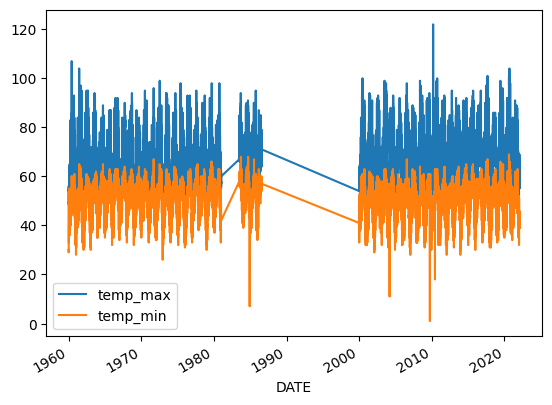

In [906]:
core_weather[["temp_max", "temp_min"]].plot()

Here we can see that we are missing some data that could be assumed to to be between 1990 and 1999

In [907]:
# Here we can see how many observations are done for each year

core_weather.index.year.value_counts().sort_index()

DATE
1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    364
2022     28
Name: count, dtype: int64

<Axes: xlabel='DATE'>

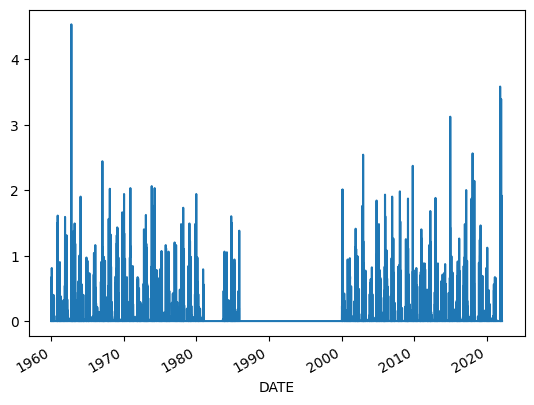

In [908]:
# Plot out the percipitation column to see if there are any issues

core_weather["precip"].plot()

In [909]:
# Another exploration and see how much it has rained and group by year 

core_weather.groupby(core_weather.index.year).sum()["precip"]

DATE
1960    14.01
1961    13.87
1962    22.47
1963    19.11
1964    16.83
1965    16.32
1966    13.11
1967    23.98
1968    17.19
1969    25.70
1970    25.31
1971    10.61
1972    16.27
1973    29.37
1974    16.87
1975    17.54
1976     8.64
1977    11.70
1978    22.57
1979    23.79
1980    13.58
1983     7.13
1984    16.03
1985     8.50
1986     0.00
2000    21.09
2001    22.84
2002    19.12
2003    11.37
2004    12.97
2005    27.37
2006    22.79
2007    12.79
2008    13.86
2009    14.57
2010    22.67
2011    16.06
2012    22.93
2013     4.89
2014    19.62
2015     8.58
2016    19.77
2017    23.34
2018    16.82
2019    20.00
2020     6.42
2021    20.82
2022     0.25
Name: precip, dtype: float64

<Axes: xlabel='DATE'>

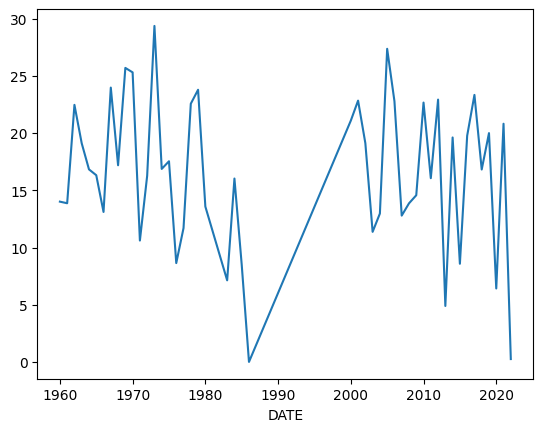

In [910]:

core_weather.groupby(core_weather.index.year).apply(lambda x: x["precip"].sum()).plot()

## Training our first ML Model

Here we predict tomorrows maximum temp using historical data


In [911]:
# Create target (what we are trying to predict)
# Shift -1 will pull every row back 1 position
# Temp Max creates tomorrows temp and so target is the prediction for tomorrow

core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [912]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0
2022-01-26,0.0,57.0,41.0,67.0


In [913]:
# As can be seen we dont have the weather for Jan 29th so the value is null

core_weather = core_weather.iloc[:-1,:].copy()

In [914]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0


In [915]:
# Now we import our ML model and Ridge minimises overfitting

from sklearn.linear_model import Ridge

# The model is initialised into Reg
# Alpha is a parameter which controls how the coofecient of the regression model is analysed
reg = Ridge(alpha=.1)

This list is the predictors which is the varibales we are using to predict the target

In [916]:
predictors = ["precip", "temp_max", "temp_min"]

Split the data into a training and test set

In [917]:
# Data all the way from before 2020
train = core_weather.loc[:"2020-12-31"]

# Data from 2021 till 2022
test = core_weather.loc["2021-01-01":]

*when using time series, dont use data from the future, it has to be from the past*

In [918]:
train

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.00,49.0,30.0,49.0
1960-01-02,0.00,49.0,29.0,54.0
1960-01-03,0.00,54.0,35.0,54.0
1960-01-04,0.00,54.0,36.0,55.0
1960-01-05,0.00,55.0,33.0,53.0
...,...,...,...,...
2020-12-27,0.00,63.0,44.0,61.0
2020-12-28,0.10,61.0,42.0,60.0
2020-12-29,0.00,60.0,39.0,56.0


In [919]:
test

,precip,temp_max,temp_min,target
DATE,,,,
2021-01-01,0.00,60.0,40.0,57.0
2021-01-02,0.14,57.0,51.0,56.0
2021-01-03,0.00,56.0,49.0,62.0
2021-01-04,0.36,62.0,46.0,59.0
2021-01-05,0.00,59.0,42.0,59.0
...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0
2022-01-24,0.00,60.0,39.0,57.0
2022-01-25,0.00,57.0,43.0,57.0


In [920]:
# We now fit the model to our data and make some predictions
# Fit to our training dataset with our predictors and predit our target

reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [921]:
# Here we test our predictions against our test set set using the predictors column

predictions = reg.predict(test[predictors])

In [922]:
# Here we see how well we did with mean absolute error

from sklearn.metrics import mean_absolute_error

In [923]:
# This will show us how much we were off by degrees

mean_absolute_error(test["target"], predictions)

np.float64(3.4111699434528306)

## Evaluating our model

In [924]:
# Combine our actuals and predictions to see how well they performed and differences
# Concatonate the actuals (test-target), with our predictions.
# To concatonate the predictions we need to convert them from numpy to a pandas series
# concatonate on axis 1, each series is a column and concatonate them

combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [925]:
combined

,actual,predictions
DATE,,
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
2021-01-05,59.0,59.444266
...,...,...
2022-01-23,60.0,59.985714
2022-01-24,57.0,59.626333
2022-01-25,57.0,58.181680


<Axes: xlabel='DATE'>

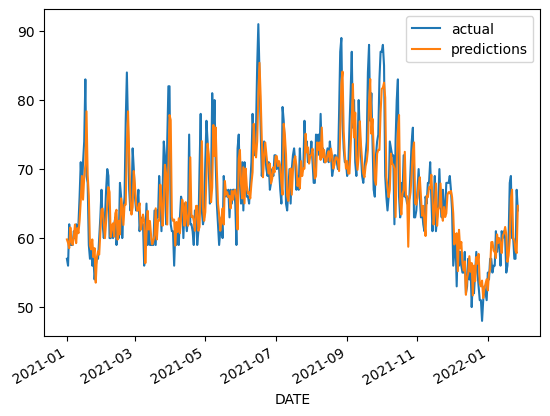

In [926]:
combined.plot()

Here we see that there are cases where our acutal is a lot different to our predictions and cases where they didnt go as low as the temp

In [927]:
# We see the our coefficient of our regression model, to see how the differenet variables are being used
# Pericipitation has a negative impact
# Temp max - has a big input
# Temp min - has a small input

reg.coef_

array([-2.20730384,  0.72113834,  0.17969047])

## Creating a function to make predictions

Collate all the functions and wrap them all up into one

In [928]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]

    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_squared_error(test["target"], predictions)
    
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

## Adding in Rolling Means

In [929]:
# Here we create some more predictors, looka t average temp for month, with rolling mean
# for the temp max columns, for the 30 days before every row, find the rolling mean and asssing to month max
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

In [930]:
core_weather

,precip,temp_max,temp_min,target,month_max
DATE,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN
1960-01-02,0.0,49.0,29.0,54.0,NaN
1960-01-03,0.0,54.0,35.0,54.0,NaN
1960-01-04,0.0,54.0,36.0,55.0,NaN
1960-01-05,0.0,55.0,33.0,53.0,NaN
...,...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0,56.900000
2022-01-24,0.0,60.0,39.0,57.0,57.066667
2022-01-25,0.0,57.0,43.0,57.0,57.200000


Mostly Nan, as you need 30 days before a row, when there isnt 30 days before the row, then it shows as NaN but most of the later rows, you see the mean

In [931]:
# for the given day, was the temp diffreent than the monthly mean or not

core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]

In [932]:
# This looks at the ratio between the maximmum ratio and the min

core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]

In [933]:
# Here we add extra predictors which are the last three

predictiors = ["precip", "temp_max", "temp_min", "month_max", "month_day_max", "max_min"]

In [934]:
# Here we remove the first 30 rows as they have NaN values

core_weather = core_weather.iloc[30:,:].copy()

In [935]:
error, combined = create_predictions(predictors, core_weather, reg)

In [936]:
error

np.float64(20.55929561195863)

<Axes: xlabel='DATE'>

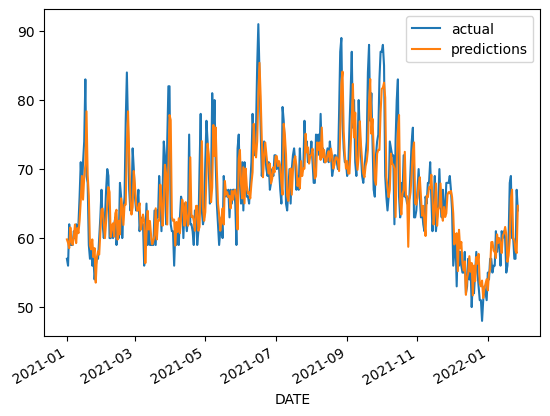

In [937]:
combined.plot()

## Adding in Monthly and Daily Averages

In [938]:
# core_weather["monthly_avg"] = core_weather["temp_max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())


In [939]:
core_weather["monthly_avg"] = core_weather.groupby(core_weather.index.month)[
    "temp_max"
].transform(lambda x: x.expanding(1).mean())

This calculates the expanding mean within each group and assigns it to the new column "monthly_avg", within the original DataFrame index.

In [940]:
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg
DATE,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000
...,...,...,...,...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0,56.900000,0.948333,1.463415,56.781536
2022-01-24,0.00,60.0,39.0,57.0,57.066667,0.951111,1.538462,56.783803
2022-01-25,0.00,57.0,43.0,57.0,57.200000,1.003509,1.325581,56.783955


In [941]:
core_weather["day_of_year_avg"] = core_weather.groupby(core_weather.index.dayofyear)[
    "temp_max"
].transform(lambda x: x.expanding(1).mean())

In [942]:
predictiors = ["precip", "temp_max", "temp_min", "month_max", "month_day_max", "max_min", "day_of_year_avg", "monthly_avg"]

In [943]:
error, combined = create_predictions(predictors, core_weather, reg)

In [944]:
error

np.float64(20.55929561195863)

In [945]:
reg.coef_

array([-2.20981338,  0.72105054,  0.17954946])

In [946]:
error, combined = create_predictions(predictors + ["monthly_avg", "day_of_year_avg"], core_weather, reg)
error

np.float64(19.294699947500572)

In [947]:
core_weather.corr()["target"]

precip            -0.205413
temp_max           0.821650
temp_min           0.596016
target             1.000000
month_max          0.686842
month_day_max     -0.421537
max_min            0.045228
monthly_avg        0.689805
day_of_year_avg    0.712334
Name: target, dtype: float64

In [948]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [949]:
combined.sort_values("diff", ascending=False).head(10)

,actual,predictions,diff
DATE,,,
2021-01-17,83.0,68.370567,14.629433
2021-04-01,62.0,75.840012,13.840012
2021-05-07,81.0,67.891639,13.108361
2021-02-21,77.0,64.240263,12.759737
2021-02-22,84.0,71.449859,12.550141
2021-10-16,66.0,78.525229,12.525229
2021-03-30,82.0,70.120149,11.879851
2021-07-07,79.0,67.151648,11.848352
2021-03-29,74.0,62.487367,11.512633
